# wholesale
Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen

- Channel 
- Region 
- Fresh (frescos)
- Milk 
- Grocery 
- Frozen 
- Detergents_Paper
- Delicassen

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
    # 1. Cargar el dataset
    df = pd.read_csv("./datasets/wholesale.csv")  # Cambia por la ruta correspondiente

In [4]:
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

In [7]:
#Todas las columnnas son integer  no es necesario generar variables dummies, todos los campos osn enteros
#las variables dummies se usan para regresion 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
# 3. Seleccionar columnas numéricas
# Seleccionamos solo las columnas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols 

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

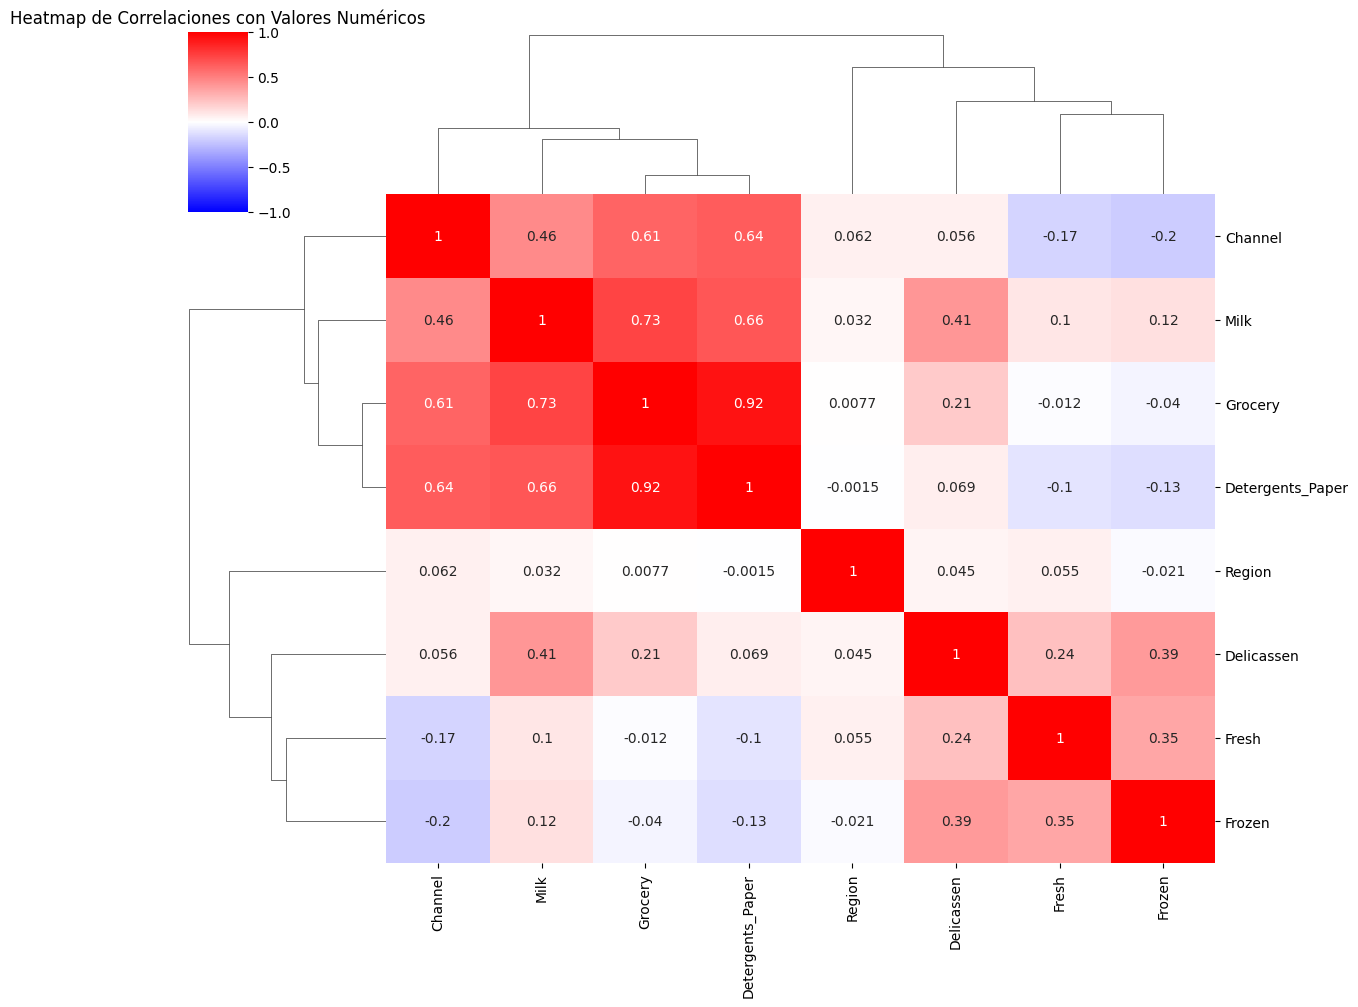

In [22]:
# Crear un heatmap de correlación
plt.figure(figsize=(10, 8))
sns.clustermap(df[numeric_cols].corr(), annot=True, cmap="bwr", vmin=-1, vmax=1, figsize=(12, 10))
plt.title("Heatmap de Correlaciones con Valores Numéricos")
plt.show()

- 

In [24]:
# 4. Escalar las variables seleccionadas.Normalizar los datos de todas las columnas numericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

In [26]:
# Mostrar los datos normalizados
print("\nDatos normalizados (primeras filas):")
print(X_scaled[:5])


Datos normalizados (primeras filas):
[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [15]:
X_scaled.shape  #numero de filas y columnas usamos las columnas indicvar las  las componentes.

(440, 8)

In [16]:
X_scaled.shape[1]#las columnasm    X_scaled.shape[0]#las filas 

8

In [27]:
# 5. Aplicar PCA.# Creamos un modelo PCA (Análisis de Componentes Principales)
pca = PCA(n_components=X_scaled.shape[1])  # Mantener todas las componentes de columna numerica
X_pca = pca.fit_transform(X_scaled)#fit_transform ajusta el modelo PCA a los datos escalados y luego transforma estos datos a las nuevas componentes principales.
#X_pca contendrá los datos transformados en el espacio de las componentes principales.

In [28]:
X_pca

array([[ 0.84393893, -0.51535075,  0.76763222, ...,  0.93944129,
         0.65476177,  0.01810169],
       [ 1.06267645, -0.48460126,  0.67297526, ...,  0.86722684,
         0.51102248,  0.0778948 ],
       [ 1.26914052,  0.68205455,  0.6640946 , ...,  1.07844165,
        -0.20315184, -0.2540374 ],
       ...,
       [ 3.86514909, -0.47985376,  0.52534452, ..., -0.28032041,
        -0.57529675, -0.08900336],
       [-1.09706738, -0.06989568,  0.63012755, ..., -0.33517   ,
        -0.15374358, -0.03730795],
       [-1.16595067, -0.90215675,  0.59770486, ..., -0.50872064,
         0.02436002,  0.01866823]])

In [29]:
# 6. Visualización de los pesos, genero un dataframe con pca
loadings_PCA = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f'PCA{i+1}' for i in range(X_scaled.shape[1])]#hasta el numero de columnas
)

print("\nPesos de las variables originales en las componentes principales:")
loadings_PCA


Pesos de las variables originales en las componentes principales:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PCA1,0.428292,0.024726,-0.025319,0.474410,0.536329,-0.029975,0.523906,0.164997
PCA2,-0.204699,0.043130,0.513445,0.205541,-0.008718,0.592745,-0.121083,0.533181
PCA3,0.082980,0.982501,0.088951,-0.025751,-0.045314,-0.122157,-0.047481,0.000930
PCA4,-0.029644,-0.077845,0.798476,-0.054022,0.121586,-0.161317,0.151012,-0.537558
PCA5,-0.036206,0.132509,-0.258117,-0.072086,0.111730,0.754212,0.176503,-0.544827
PCA6,0.863507,-0.089765,0.147475,-0.315933,-0.213699,0.194360,-0.195754,0.054533
PCA7,0.139899,-0.023280,-0.027174,0.789020,-0.353064,-0.005337,-0.371374,-0.306583
PCA8,0.019335,-0.001545,-0.033851,-0.039291,0.715984,-0.012983,-0.691672,-0.075643


In [30]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_cols
)

print("\nPesos de las variables originales en las componentes principales:")
loadings


Pesos de las variables originales en las componentes principales:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.428292,0.024726,-0.025319,0.474410,0.536329,-0.029975,0.523906,0.164997
1,-0.204699,0.043130,0.513445,0.205541,-0.008718,0.592745,-0.121083,0.533181
2,0.082980,0.982501,0.088951,-0.025751,-0.045314,-0.122157,-0.047481,0.000930
3,-0.029644,-0.077845,0.798476,-0.054022,0.121586,-0.161317,0.151012,-0.537558
4,-0.036206,0.132509,-0.258117,-0.072086,0.111730,0.754212,0.176503,-0.544827
5,0.863507,-0.089765,0.147475,-0.315933,-0.213699,0.194360,-0.195754,0.054533
6,0.139899,-0.023280,-0.027174,0.789020,-0.353064,-0.005337,-0.371374,-0.306583
7,0.019335,-0.001545,-0.033851,-0.039291,0.715984,-0.012983,-0.691672,-0.075643


# **Interpretación de los pesos de las variables originales en las componentes principales**

Cada fila corresponde a una **componente principal (PCA)** y cada columna muestra el peso (*loading*) de una variable original en esa componente. Los pesos indican qué tan importante es cada variable para esa componente y si su influencia es positiva o negativa.

---

## **Análisis de cada componente**

### **PCA1 (Primera componente principal)**



### **PCA2 (Segunda componente principal)**

**Interpretación**:  



---

### **PCA3 (Tercera componente principal)**

**Interpretación**:  

---

### **PCA4 (Cuarta componente principal)*

**Interpretación**:  


---

### **PCA5 y PCA6**
- **PCA5**:  
  

- **PCA6**:  





In [37]:
# 6. Visualizar varianza explicada   pca.explained_variance_ratio_ 

explained_variance_ratio = pca.explained_variance_ratio_   #Cada componente principal captura una parte de la variabilidad de los datos, la información de los datos.

explained_variance_ratio



# PCA1: 0.38750123 → 38,75% de la varianza total.
# La primera componente principal explica la mayor parte de la variabilidad en los datos.

# PCA2: 0.22374588 → 22,37% de la varianza total.
# La segunda componente principal explica una parte significativa, pero menor que la primera.

# PCA3: 0.12647173 → 12,64% de la varianza total.
# La tercera componente sigue aportando información relevante.

#PCA4: 0.09229904  → 9,22% de la varianza total.
#La cuarta componente aporta algo de información, pero mucho menos que las primeras tres.

#PCA5: 0.06957905 → 6,95% de la varianza total.
#La quinta componente captura muy poca información.

#PCA6: 0.05741354  → 5.74% de la varianza total.
#La sexta  componente aporta información mínima .

#PCA7: 0.03514076  → 3,51% de la varianza total.
#La septima  componente aporta información mínima .

#PCA8: 0.03514076  → 3,51% de la varianza total.
#La octava  componente NO aporta información






array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354, 0.03514076, 0.00784877])

In [38]:
len(explained_variance_ratio)

8

In [39]:
explained_variance_ratio.cumsum()  # es un método de NumPy o pandas que devuelve la suma acumulada de un array o columna. 

array([0.38750123, 0.61124711, 0.73771884, 0.83001788, 0.89959693,
       0.95701047, 0.99215123, 1.        ])

In [40]:
enumerate(explained_variance_ratio.cumsum())

In [53]:
# Resumen de varianza explicada # se ve claro que el ultimo componente principal no aporta informacion
print("\nVarianza explicada acumulada:")
for i, var in enumerate(explained_variance_ratio.cumsum()):
    print(f"PCA{i+1}: {var:.2%}")


Varianza explicada acumulada:
PCA1: 32.66%
PCA2: 54.59%
PCA3: 68.19%
PCA4: 80.07%
PCA5: 89.94%
PCA6: 95.25%
PCA7: 98.29%
PCA8: 100.00%
PCA9: 100.00%


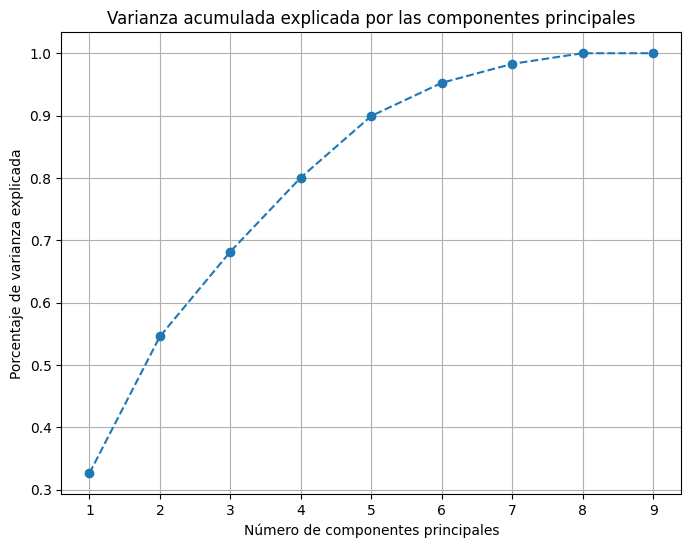

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por las componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.show()



### ¿Qué representa el gráfico?

El eje X: Representa el número de componentes principales seleccionados.

El eje Y: Muestra el porcentaje acumulado de la varianza explicada por las componentes seleccionadas.

El gráfico indica cómo las componentes principales van capturando progresivamente más información de los datos originales.

### PCA1 (Primera componente principal):

Explica aproximadamente el 32% de la varianza total (0.32 en el eje Y).
Esta es la componente que captura la mayor cantidad de información de los datos originales.


### PCA1 + PCA2 (Primeras dos componentes principales):

Juntas explican más del 50% de la varianza total.

Esto significa que estas dos componentes ya resumen una gran parte de la información.


### PCA1 + PCA2 + PCA3 (Primeras tres componentes principales):

Acumulan cerca del 70% de la varianza.
Es un buen equilibrio entre reducción de dimensionalidad y retención de información.


### PCA1 + PCA2 + PCA3 + PCA4 (Primeras cuatro componentes principales):

Explican  el 80% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 (Primeras cinco componentes principales):

Explican  casi el 90% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6 (Primeras seis componentes principales):

Explican  mas del 95% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6+ PCA7 (Primeras siete componentes principales):

Explican  mas del 98% de la varianza total.


A partir de este punto, las siguientes componentes (PCA8,PCA9) explican pequeñas cantidades de varianza adicional y PCA10 no da infomracion de varianza


### Componentes posteriores (PCA8 en adelante):

La curva se aplana a partir de aquí.
Esto indica que las componentes adicionales aportan muy poca información nueva, y podrían no ser necesarias para el análisis.

### ¿Cuántas componentes principales deberíamos usar?

Generalmente, elegimos el número de componentes que expliquen entre el 90% y 95% de la varianza.

En este caso, con 6 componentes principales, explicamos aproximadamente el 95% de la varianza, lo cual es suficiente para conservar la mayor parte de la información.

In [59]:
# Elegir el número de componentes principales 
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Mostrar los datos comprimidos
print("\nDatos comprimidos (primeras filas):")
print(X_pca[:5])


Datos comprimidos (primeras filas):
[[ 2.03565349 -1.55957537 -2.07790571 -2.84127339 -0.6320846   0.59238583]
 [ 0.37148564  1.30982121 -0.03758632 -0.02573277 -0.57571056  0.15397123]
 [ 0.05240234  0.94515069  0.04977308 -0.03789765 -0.72325614  0.15791029]
 [ 1.65948759  0.97759947  1.18003092  0.20094839 -0.34109396 -0.9449746 ]
 [ 3.32751849 -0.70241491 -1.96086884 -2.76999885 -0.55685074 -0.20299905]]


In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clústeres como una nueva columna en el dataset original
df["Cluster"] = clusters

# Mostrar algunas filas con el clúster asignado
print("\nDataset con clústeres asignados:")
print(df.head())


Dataset con clústeres asignados:
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

   Cluster  
0        2  
1        1  
2        1  
3        1  
4        2  


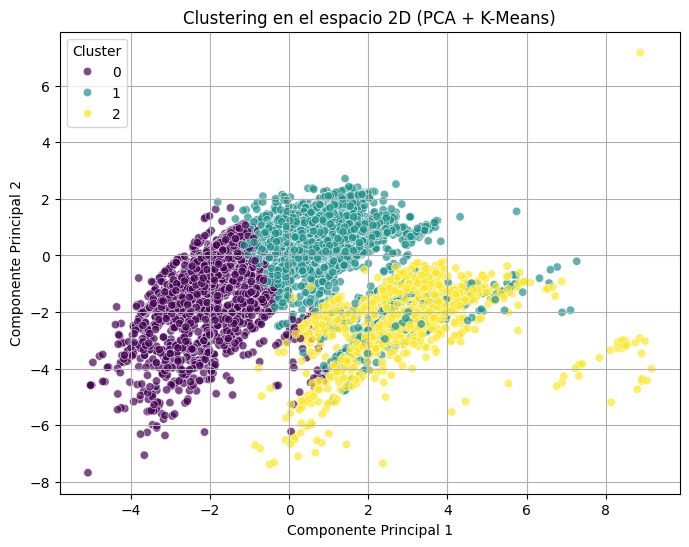

In [61]:
# Visualizar los datos comprimidos en 2D junto con los clústeres
plt.figure(figsize=(8, 6))

# Graficar los datos usando las primeras dos componentes principales
sns.scatterplot(
    x=X_pca[:, 0],  # Primera componente principal
    y=X_pca[:, 1],  # Segunda componente principal
    hue=df["Cluster"],  # Clúster asignado como color
    palette="viridis",  # Paleta de colores
    alpha=0.7  # Transparencia
)

# Etiquetas y título
plt.title("Clustering en el espacio 2D (PCA + K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


Los datos se agrupan en tres clústeres que  estan bien definidos, lo que indica que K-Means  ha identificado patrones en los datos.